# Model performance analysis

## Load data & models

In [1]:
import functions_model_analysis as f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as ff

In [2]:
# date = "2019-08-14"
# path = r"../Data/combined/dataframe_extended/"
# data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=False)
# data = f.data_normalization(data)

date_from = "2019-08-01"
date_to = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date_from, date_to=date_to, df_path=path, predict_only=False)
data = f.data_normalization(data)

100%|██████████| 14/14 [00:59<00:00,  4.25s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


In [4]:
lr = ff.load_object("LinearRegression")

LinReg = f.load_object('LinearRegression')
LinReg_noXY = f.load_object('LinearRegression_NoXY')
RigdeReg = f.load_object('RidgeRegression')
LassoReg = f.load_object('LassoRegression')
ElasticNetReg = f.load_object('ElasticNetRegression')
RandomForest = f.load_object('RandomForest')
GradientBoosting = f.load_object('XGBoost')

In [5]:
data_predicted = f.mean_predict(lr, data)


In [6]:
data_predicted # 871181 -> 11942801 

,row,col,mean_prediction,std_prediction,error_prediction,opt_value
0,12,843,0.316602,0.022339,0.259445,0.057157
1,13,841,0.319378,0.021206,0.171598,0.147780
2,13,842,0.324653,0.020760,0.275523,0.049130
3,13,843,0.294943,0.023314,0.284593,0.010350
4,13,845,0.331968,0.019076,0.321104,0.010864
...,...,...,...,...,...,...
1159656,2549,666,0.345285,0.050087,0.036813,0.308473
1159657,2549,667,0.346533,0.049664,0.213649,0.132884
1159658,2549,668,0.346277,0.049327,0.136143,0.210134
1159659,2549,669,0.337399,0.048233,0.130689,0.206709


### plot test scatter

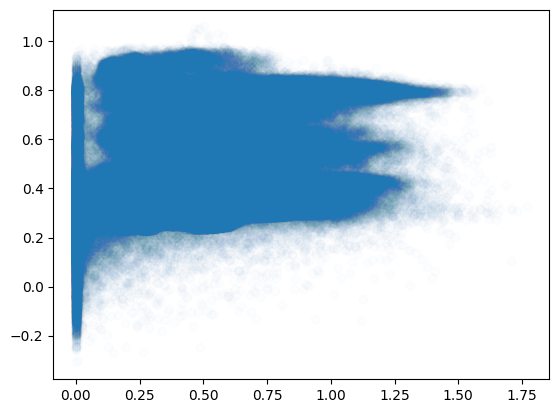

In [13]:
plt.scatter(data_predicted['opt_value'], data_predicted['mean_prediction'], alpha = 0.01)

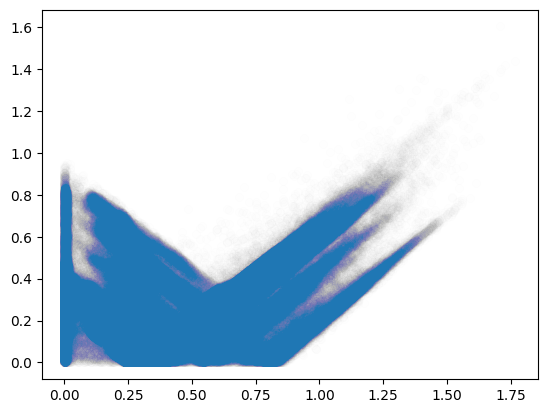

In [16]:
plt.scatter(data_predicted['opt_value'], data_predicted['error_prediction'], alpha = 0.005)

### plot binned

In [7]:
df = data_predicted
x=df['opt_value']
y=df['mean_prediction']

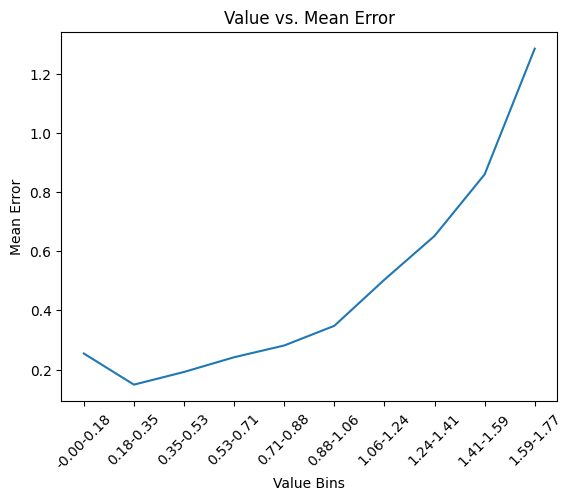

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'value' and 'error'

# Define the number of bins and bin range
num_bins = 10
bin_range = (df['opt_value'].min(), df['opt_value'].max())

# Create a new column with bin labels
df['value_bin'] = pd.cut(df['opt_value'], bins=num_bins, labels=False)

# Calculate the mean error for each bin
mean_error = df.groupby('value_bin')['error_prediction'].mean()

# Get the bin edges and convert them to strings for labeling
bin_edges = pd.cut(df['opt_value'], bins=num_bins, labels=False, retbins=True)[1]
bin_labels = [f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

# Plot the mean error against the bin values with bin range labels
plt.plot(bin_labels, mean_error.values)
plt.xlabel('Value Bins')
plt.ylabel('Mean Error')
plt.title('Value vs. Mean Error')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


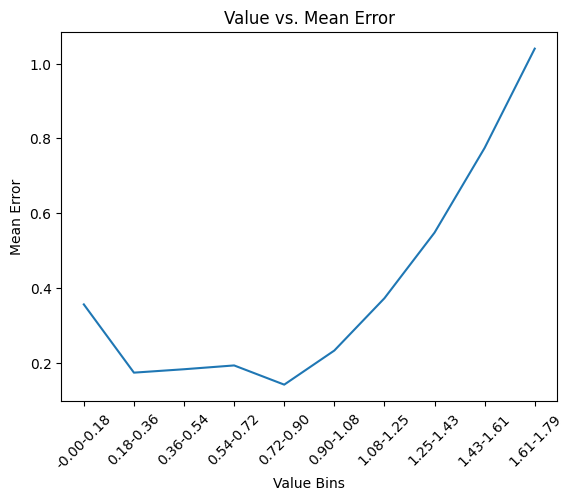

In [10]:
# 14 days:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'value' and 'error'

# Define the number of bins and bin range
num_bins = 10
bin_range = (df['opt_value'].min(), df['opt_value'].max())

# Create a new column with bin labels
df['value_bin'] = pd.cut(df['opt_value'], bins=num_bins, labels=False)

# Calculate the mean error for each bin
mean_error = df.groupby('value_bin')['error_prediction'].mean()

# Get the bin edges and convert them to strings for labeling
bin_edges = pd.cut(df['opt_value'], bins=num_bins, labels=False, retbins=True)[1]
bin_labels = [f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

# Plot the mean error against the bin values with bin range labels
plt.plot(bin_labels, mean_error.values)
plt.xlabel('Value Bins')
plt.ylabel('Mean Error')
plt.title('Value vs. Mean Error')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


### Other plots

#### heat

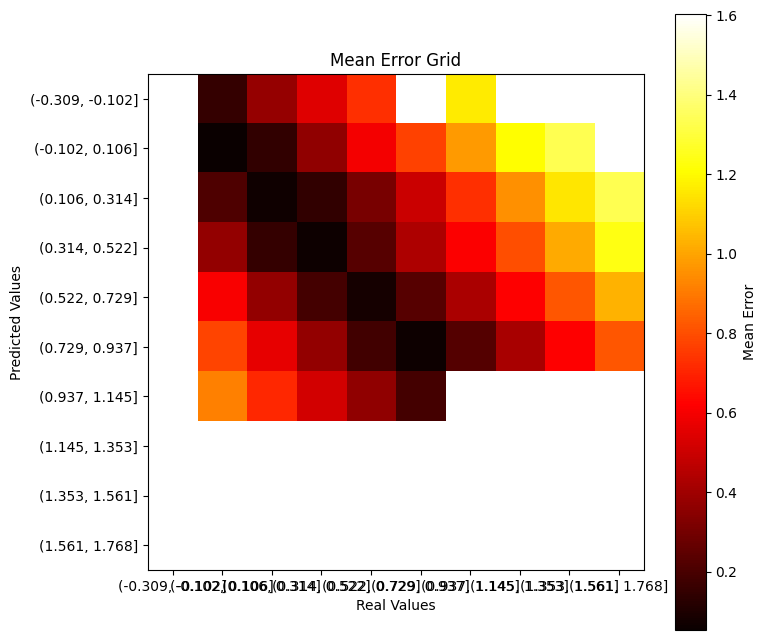

In [31]:
df = data_predicted

# Define the number of bins
num_bins = 10

# Calculate the bin edges for real and predicted values
min_value = min(df['opt_value'].min(), df['mean_prediction'].min())
max_value = max(df['opt_value'].max(), df['mean_prediction'].max())
bin_edges = np.linspace(min_value, max_value, num=num_bins+1)

# Bin the real and predicted values using the same bin edges
real_bins = pd.cut(df['opt_value'], bins=bin_edges)
pred_bins = pd.cut(df['mean_prediction'], bins=bin_edges)

# Group the data by the bin ranges and calculate the mean error for each group
mean_error = df.groupby([real_bins, pred_bins])['error_prediction'].mean().unstack().T

# Create the heatmap grid
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(mean_error.values, cmap='hot')

# Set x and y axis labels
ax.set_xlabel('Real Values')
ax.set_ylabel('Predicted Values')

# Set x and y axis tick labels
ax.set_xticks(np.arange(num_bins))
ax.set_yticks(np.arange(num_bins))
ax.set_xticklabels(mean_error.columns)
ax.set_yticklabels(mean_error.index)

# Set colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Mean Error')

# Show the plot
plt.title('Mean Error Grid')
plt.show()


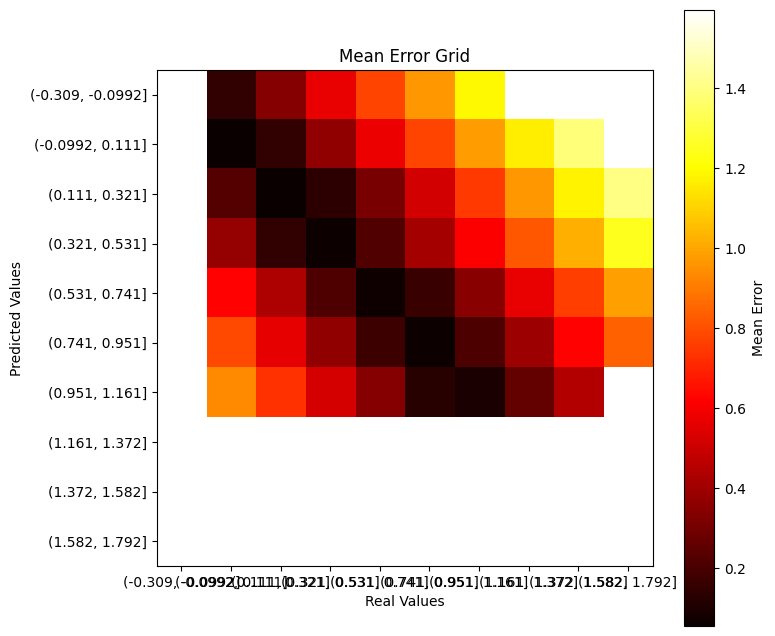

In [11]:
df = data_predicted

# Define the number of bins
num_bins = 10

# Calculate the bin edges for real and predicted values
min_value = min(df['opt_value'].min(), df['mean_prediction'].min())
max_value = max(df['opt_value'].max(), df['mean_prediction'].max())
bin_edges = np.linspace(min_value, max_value, num=num_bins+1)

# Bin the real and predicted values using the same bin edges
real_bins = pd.cut(df['opt_value'], bins=bin_edges)
pred_bins = pd.cut(df['mean_prediction'], bins=bin_edges)

# Group the data by the bin ranges and calculate the mean error for each group
mean_error = df.groupby([real_bins, pred_bins])['error_prediction'].mean().unstack().T

# Create the heatmap grid
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(mean_error.values, cmap='hot')

# Set x and y axis labels
ax.set_xlabel('Real Values')
ax.set_ylabel('Predicted Values')

# Set x and y axis tick labels
ax.set_xticks(np.arange(num_bins))
ax.set_yticks(np.arange(num_bins))
ax.set_xticklabels(mean_error.columns)
ax.set_yticklabels(mean_error.index)

# Set colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Mean Error')

# Show the plot
plt.title('Mean Error Grid')
plt.show()


#### real vs pred

In [12]:
# # https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
# from matplotlib import cm
# from matplotlib.colors import Normalize 
# from scipy.interpolate import interpn

# def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
#     """
#     Scatter plot colored by 2d histogram
#     """
#     if ax is None :
#         fig , ax = plt.subplots()
#     data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
#     z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#     #To be sure to plot all data
#     z[np.where(np.isnan(z))] = 0.0

#     # Sort the points by density, so that the densest points are plotted last
#     if sort :
#         # idx = z.argsort()
#         # x, y, z = x[idx], y[idx], z[idx]

#         idx = np.argsort(z)
#         x, y, z = np.array(x)[idx], np.array(y)[idx], np.array(z)[idx]


#     sc = ax.scatter( x, y, c=z, cmap ='YlOrBr_r' , **kwargs )
#     ax.set_xlabel('real value')
#     ax.set_ylabel('predicted value')
#     ax.set_title('Real vs. Predicted Values')

#     # Find the range of data
#     data_min = min(x) #min(min(x), min(y))
#     data_max = max(y) # max(max(x), max(y))

#     # Adding the line of exact match
#     lin = ax.plot([data_min, data_max], [data_min, data_max], color='black', linestyle='--')

#     norm = Normalize(vmin = np.min(z), vmax = np.max(z))
#     cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap = 'YlOrBr_r'), ax=ax)
#     cbar.ax.set_ylabel('Density')

#     return ax


In [7]:
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib


# import numpy as np
# import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn

def density_scatter(x, y, ax=None, sort=True, bins=20, bin_width=0.25, **kwargs):
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None:
        fig, ax = plt.subplots()
    data, x_e, y_e = np.histogram2d(x, y, bins=bins, density=True)
    z = interpn((0.5 * (x_e[1:] + x_e[:-1]), 0.5 * (y_e[1:] + y_e[:-1])), data, np.vstack([x, y]).T,
                method="splinef2d", bounds_error=False)

    # To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort:
        idx = np.argsort(z)
        x, y, z = np.array(x)[idx], np.array(y)[idx], np.array(z)[idx]

    sc = ax.scatter(x, y, c=z, cmap='YlOrBr_r', **kwargs)
    ax.set_xlabel('real value')
    ax.set_ylabel('predicted value')
    ax.set_title('Real vs. Predicted Values')

    # Find the range of data
    data_min = min(x)
    data_max = max(y)

    # # Adding the line of exact match
    # lin = ax.plot([data_min, data_max], [data_min, data_max], color='black', linestyle='--')

    # Calculate average predicted value per bin of real value
    bin_edges = np.arange(min(x), max(x) + bin_width, bin_width)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    predicted_avg = [np.mean(y[(x >= bin_edges[i]) & (x < bin_edges[i + 1])]) for i in range(len(bin_centers))]

    # Plot line with average predicted value per bin
    line = ax.plot(bin_centers, predicted_avg, color='#222222', linestyle='--', linewidth=2, label='Average Predicted Value')

    # Colorbar and normalization
    norm = Normalize(vmin=np.min(z), vmax=np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='YlOrBr_r'), ax=ax)
    cbar.ax.set_ylabel('Density')

    # Add legend
    # handles, labels = ax.get_legend_handles_labels()
    # handles.extend(line)
    # labels.extend([h.get_label() for h in line])
    # ax.legend(handles, labels)
    # Add legend
    ax.legend([line[0]], ['Average Predicted Value'])

    return ax


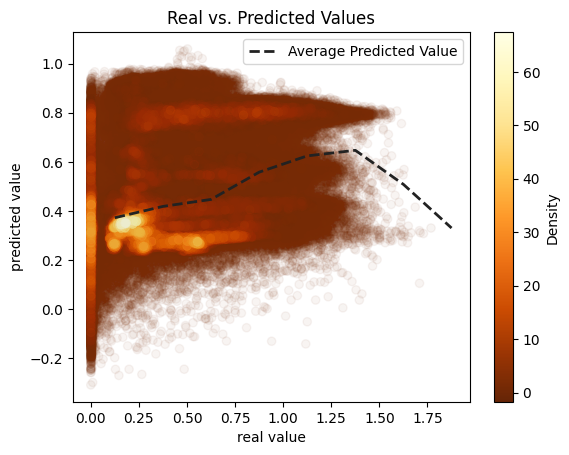

In [79]:
df = data_predicted
x=df['opt_value']
y=df['mean_prediction']

density_scatter( list(x) , list(y), ax = None, sort = True, bins = 2000, alpha = 0.05); 

In [8]:
df = data_predicted[data_predicted['opt_value'] >0]

/mnt/c/Users/linas/OneDrive/Documents/ITU/Semester3/RP_Greenland/RP_Greenland/.venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/mnt/c/Users/linas/OneDrive/Documents/ITU/Semester3/RP_Greenland/RP_Greenland/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


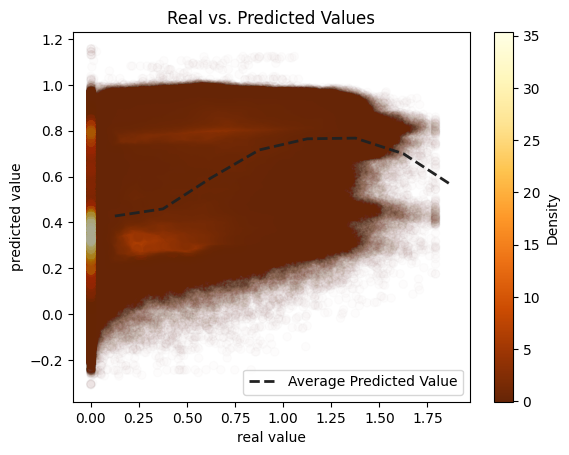

In [9]:
# 14 days:

#df = data_predicted
x=df['opt_value']
y=df['mean_prediction']

density_scatter( list(x) , list(y), ax = None, sort = True, bins = 1000, alpha = 0.01); 

In [ ]:
# fix vedran report issues
# redo sketches
# fix residuals and do some residual plots
# shap?
# do the pred vs real plots for all models??!!
# make feature importance prettier to put plot in report
# put result table in report
# fix up the opt val vs mean error size and error count (mean line on top of histogram)

# area analysis:
# compare rmse north and south
# look at area around melt?, calculate smaller area rmse and compare to a mean opt value. 
# put all plots in report
# 